In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
kp=pd.read_csv("C:\\Users\\Pratik1\\Desktop\\dataset\Downloads\\iris.csv")
kp

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica  

[150 rows x 6 columns]

In [3]:
kp.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [4]:
kp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
kp["Legal_species"]=le.fit_transform(kp["Species"])

In [6]:
kp.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species  \
0   1            5.1           3.5            1.4           0.2  Iris-setosa   
1   2            4.9           3.0            1.4           0.2  Iris-setosa   
2   3            4.7           3.2            1.3           0.2  Iris-setosa   
3   4            4.6           3.1            1.5           0.2  Iris-setosa   
4   5            5.0           3.6            1.4           0.2  Iris-setosa   

   Legal_species  
0              0  
1              0  
2              0  
3              0  
4              0

In [7]:
kp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
 6   Legal_species  150 non-null    int32  
dtypes: float64(4), int32(1), int64(1), object(1)
memory usage: 7.7+ KB


In [8]:
x=kp.drop(columns=["Species","Legal_species"])
y=kp["Legal_species"]

In [9]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [23]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(multi_class="multinomial")

In [13]:
model.fit(xtrain,ytrain)

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(multi_class='multinomial')

In [15]:
ypred=model.predict(xtest)
ypred

array([2, 2, 1, 2, 0, 1, 1, 0, 1, 1, 2, 1, 2, 0, 0, 2, 2, 0, 2, 0, 1, 1,
       2, 0, 0, 1, 0, 0, 2, 0])

In [29]:
ytest.value_counts()

0    11
2    10
1     9
Name: Legal_species, dtype: int64

In [18]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [20]:
cm=confusion_matrix(ytest,ypred)
cm

array([[11,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 10]], dtype=int64)

<AxesSubplot:>

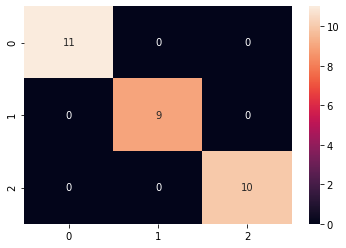

In [21]:
sns.heatmap(cm,annot=True)

In [24]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [27]:
acc=accuracy_score(ytest,ypred)
acc

1.0

In [ ]:
#feature engineering
#balancing data 
#tune hyperparameters

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [31]:
df=pd.read_csv("C:\\Users\\Pratik1\\Desktop\\dataset\\Downloads\\diabetes.csv")
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [40]:
x=df.drop(columns=["Outcome"])
y=df["Outcome"]

In [41]:
from sklearn.linear_model import LogisticRegression

In [44]:
#tune solver.penalty,c
model=LogisticRegression()
solver=["newton-cg","lbfgs","liblinear","sag","saga"]
penalty=["11","12","elasticNet"]
c=[100,10,1,0.1,0.01,0.001]

In [63]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
kfoldcv=RepeatedStratifiedKFold(n_splits=10,n_repeats=5,random_state=1)
grid=dict(solver=solver,penalty=penalty,C=c)
grid_cv=GridSearchCV(estimator=model,param_grid=grid,cv=kfoldcv,scoring="accuracy")
res=grid_cv.fit(x,y)
res.best_score_
res.best.params

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 11.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fi

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 11.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fi

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 11.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fi

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 11.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fi

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 11.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fi

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 11.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fi

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 12.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fi

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 12.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fi

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 12.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fi

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 12.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fi

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 12.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fi

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 12.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fi

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got elasticNet.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Esti

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got elasticNet.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Esti

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got elasticNet.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Esti

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got elasticNet.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Esti

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got elasticNet.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Esti

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got elasticNet.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Esti

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 11.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fi

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 11.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fi

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 11.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fi

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 11.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fi

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 11.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fi

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 11.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fi

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 11.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fi

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 12.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fi

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 12.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fi

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 12.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fi

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 12.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fi

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 12.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fi

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got elasticNet.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Esti

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got elasticNet.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Esti

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got elasticNet.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Esti

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got elasticNet.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Esti

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got elasticNet.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Esti

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got elasticNet.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Esti

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got elasticNet.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Esti

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 11.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fi

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 11.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fi

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 11.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fi

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 11.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fi

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 11.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fi

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 11.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fi

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 12.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fi

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 12.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fi

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 12.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fi

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 12.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fi

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 12.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fi

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 12.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fi

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got elasticNet.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Esti

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got elasticNet.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Esti

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got elasticNet.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Esti

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got elasticNet.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Esti

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got elasticNet.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Esti

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got elasticNet.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Esti

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 11.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fi

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 11.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fi

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 11.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fi

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 11.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fi

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 11.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fi

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 12.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fi

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 12.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fi

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 12.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fi

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 12.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fi

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 12.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fi

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 12.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fi

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 12.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fi

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got elasticNet.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Esti

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got elasticNet.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Esti

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got elasticNet.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Esti

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got elasticNet.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Esti

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got elasticNet.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Esti

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got elasticNet.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Esti

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 11.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fi

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 11.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fi

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 11.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fi

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 11.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fi

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 11.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fi

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 11.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fi

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 11.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fi

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 12.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fi

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 12.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fi

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 12.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fi

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 12.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fi

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 12.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fi

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 12.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fi

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got elasticNet.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Esti

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got elasticNet.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Esti

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got elasticNet.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Esti

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got elasticNet.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Esti

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got elasticNet.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Esti

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 11.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fi

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 11.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fi

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 11.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fi

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 11.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fi

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 11.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fi

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 11.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fi

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 12.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fi

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 12.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fi

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 12.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fi

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 12.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fi

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 12.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fi

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 12.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fi

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 12.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fi

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got elasticNet.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Esti

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got elasticNet.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Esti

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got elasticNet.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Esti

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got elasticNet.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Esti

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got elasticNet.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Esti

C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got elasticNet.

  FitFailedWarning)
C:\Users\Pratik1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Esti

ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 11.

In [ ]:
res.best_score_

In [56]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)
model=LogisticRegression(solver="lbfgs",C=100,penalty='l2')
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

In [64]:
from sklearn import metrics
acc=metrics.accuracy_score(ytest,ypred)
acc

0.7727272727272727

In [65]:
cm=metrics.confusion_matrix(ytest,ypred)
cm

array([[89, 11],
       [24, 30]], dtype=int64)

In [66]:
print(metrics.classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       100
           1       0.73      0.56      0.63        54

    accuracy                           0.77       154
   macro avg       0.76      0.72      0.73       154
weighted avg       0.77      0.77      0.76       154

